In [26]:
using KitBase, Distributions, LinearAlgebra, Flux
using KitBase.Plots, KitBase.JLD2, KitBase.WriteVTK
using Flux: @epochs

In [27]:
function get_moments(f, u, v, ω)
    w = zeros(eltype(f), 4)
    w[1] = discrete_moments(f, u, ω, 0)
    w[2] = discrete_moments(f, u, ω, 1)
    w[3] = discrete_moments(f, v, ω, 1)
    w[4] = 0.5 * (discrete_moments(f, u, ω, 2) + discrete_moments(f, v, ω, 2))
    return w
end

mpdf(u, v, prim) = @. prim[1] * (prim[4] / π) * exp(-prim[4] * ((u - prim[2])^2 + (v - prim[3])^2))

mpdf (generic function with 1 method)

In [33]:
#file = open("/home2/vavrines/Coding/KiT-RT/result/logs/a2_ev5.csv")
file = open("/home2/vavrines/Coding/KiT-RT/result/logs/xxx.csv")
data = []
for line in eachline(file)
    a = split(line, ",")
    b = [parse(Float64, a[i]) for i = 2:length(a)]
    push!(data, b)
end
pdfs = data[5:end]
nd = length(pdfs) ÷ 2

50

In [34]:
nqa = sqrt(length(data[1])) |> Int
vs = VSpace2D(-5.0, 5.0, nqa, -5.0, 5.0, nqa, data[1], data[2], zero(data[1]), zero(data[2]), data[4])

VelocitySpace2D{Float64,Int64,Vector{Float64}}
domain: (-5.0,5.0) × (-5.0,5.0)
resolution: 8 × 8
ghost in u: 0
ghost in v: 0


In [35]:
mdfs = deepcopy(pdfs)
for i in eachindex(mdfs)
    w = get_moments(pdfs[i], vs.u, vs.v, vs.weights)
    prim = conserve_prim(w, 2.0)
    #mdfs[i] = maxwellian(vs.u, vs.v, prim)
    mdfs[i] = mpdf(vs.u, vs.v, prim)
end

In [ ]:
idx = 599
w = get_moments(pdfs[idx], vs.u, vs.v, vs.weights)


In [ ]:
w = get_moments(mdfs[idx], vs.u, vs.v, vs.weights)

In [ ]:
w = get_moments(pdfs[599], vs.u, vs.v, vs.weights)
prim = conserve_prim(w, 2.0)
#mdfs[i] = maxwellian(vs.u, vs.v, prim)
m = mpdf(vs.u, vs.v, prim)

In [ ]:
pdfs[599]

In [ ]:
prim

In [ ]:
w

In [ ]:
vs.weights |> sum

In [ ]:
pi * 25

In [ ]:
using KitBase

file = open("/home2/vavrines/Coding/KiT-RT/result/logs/a2_ev5.csv")
data = []
for line in eachline(file)
    a = split(line, ",")
    b = [parse(Float64, a[i]) for i = 2:length(a)]
    push!(data, b)
end
@show data[4] |> sum

vs1 = VSpace2D(-5, 5, 80, -5, 5, 80)
@show vs1.weights |> sum;

In [36]:
idx = rand() * length(pdfs) |> round |> Int
#norm(mdfs[idx] .- pdfs[idx])

95

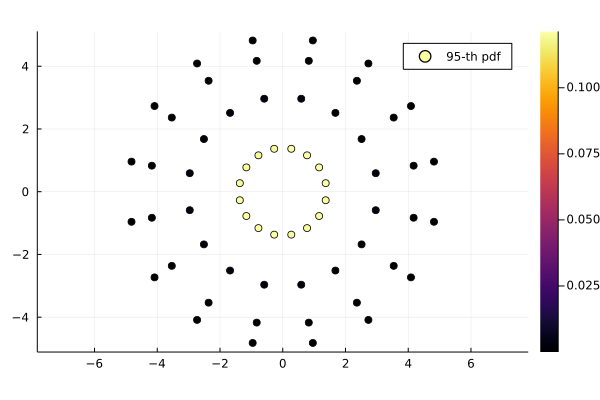

In [37]:
scatter(vs.u, vs.v, marker_z=pdfs[idx], legend=true, ratio=1, label="$(idx)-th pdf")

In [ ]:
scatter(vs.u, vs.v, marker_z=mdfs[idx], legend=true, ratio=1, label="$(idx)-th pdf")

In [ ]:
idx = 22

In [ ]:
get_moments(mdfs[idx], vs.u, vs.v, vs.weights)

In [ ]:
w = get_moments(pdfs[idx], vs.u, vs.v, vs.weights)

In [ ]:
prim = conserve_prim(w, 2)

In [ ]:
prim_conserve(prim, 2)

In [ ]:
m = maxwellian(vs.u, vs.v, prim)

In [ ]:
get_moments(m, vs.u, vs.v, vs.weights)

In [ ]:
prim = [1.0, 0.0, 0.0, 1.0]
w = prim_conserve(prim, 2.0)

In [ ]:
M = maxwellian(vs.u, vs.v, prim)

In [ ]:
get_moments(M, vs.u, vs.v, vs.weights)

In [ ]:
sum(M .* vs.weights)

### MWE

In [24]:
using KitBase

function get_moments(f, u, v, ω)
    w = zeros(eltype(f), 4)
    w[1] = discrete_moments(f, u, ω, 0)
    w[2] = discrete_moments(f, u, ω, 1)
    w[3] = discrete_moments(f, v, ω, 1)
    w[4] = 0.5 * (discrete_moments(f, u, ω, 2) + discrete_moments(f, v, ω, 2))
    return w
end

mpdf(u, v, prim) = @. prim[1] * (prim[4] / π) * exp(-prim[4] * ((u - prim[2])^2 + (v - prim[3])^2))

#file = open("/home2/vavrines/Coding/KiT-RT/result/logs/a2_ev5.csv")
file = open("/home2/vavrines/Coding/KiT-RT/result/logs/a2_ev1.csv")
data = []
for line in eachline(file)
    a = split(line, ",")
    b = [parse(Float64, a[i]) for i = 2:length(a)]
    push!(data, b)
end

u, v, weights = data[1], data[2], data[4]

([0.029863216717, 0.029817169801, 0.029725146971, 0.029587290119, 0.029403811809, 0.029174994954, 0.02890119237, 0.028582826243, 0.028220387469, 0.027814434904  …  0.931037663881, 0.944626188315, 0.956758167634, 0.967414895206, 0.97657993913, 0.984239167571, 0.990380770555, 0.994995278175, 0.998075575194, 0.999616912019], [0.000586438254, 0.001758410518, 0.00292767144, 0.004092418105, 0.005250854558, 0.006401194574, 0.007541664411, 0.008670505549, 0.009785977396, 0.010886359974  …  -0.364401117395, -0.327567810191, -0.290229417166, -0.252443511416, -0.214268356069, -0.175762814448, -0.136986259306, -0.097998481281, -0.058859596701, -0.01962995489], [2.2481041e-5, 2.2481041e-5, 2.2481041e-5, 2.2481041e-5, 2.2481041e-5, 2.2481041e-5, 2.2481041e-5, 2.2481041e-5, 2.2481041e-5, 2.2481041e-5  …  0.00076611298, 0.00076611298, 0.00076611298, 0.00076611298, 0.00076611298, 0.00076611298, 0.00076611298, 0.00076611298, 0.00076611298, 0.00076611298])

In [25]:
prim = [1., 0., 0., 1.]
M = mpdf(u, v, prim)
w = prim_conserve(prim, 2.0)

@show sum(M .* weights), w[1]

(sum(M .* weights), w[1]) = (0.5380795070069435, 1.0)


(0.5380795070069435, 1.0)

In [ ]:
W[1] = prim[1]
W[2] = prim[1] * prim[2]
W[3] = prim[1] * prim[3]
W[4] = 0.5 * prim[1] / prim[4] / (γ - 1.0) + 0.5 * prim[1] * (prim[2]^2 + prim[3]^2)

In [15]:
get_moments(M, u, v, weights)

4-element Vector{Float64}:
  0.5106703721377844
  1.4939953939066698e-18
 -1.4410895195609113e-18
  0.2610472445463818

In [16]:
w

4-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.5

In [18]:
weights |> sum

78.53981633983997

In [19]:
pi * 5^2

78.53981633974483

In [21]:
data[3]

6400-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0